In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten ,Embedding,Reshape
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU ,regularizers
from keras.optimizers import Adam, RMSprop 
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook
import pandas as pd

Using TensorFlow backend.


In [2]:
cd /content/gdrive/My\ Drive/faraji/digikala

/content/gdrive/My Drive/faraji/digikala


In [0]:
df_cln = pd.read_csv('balance_classified.csv')

In [0]:
X = df_cln['comment']
y = df_cln['class']

In [0]:
X_0 = df_cln[ df_cln['class']==0 ]['comment']
X_1 = df_cln[ df_cln['class']==1 ]['comment']
X_2 = df_cln[ df_cln['class']==2 ]['comment']
X_3 = df_cln[ df_cln['class']==3 ]['comment']

In [0]:
X_g = pd.concat([X_0,X_1])
X_d = pd.concat([X_2 ,X_3])

In [0]:
X_g=X_g[:60000]

In [0]:
num_features=50
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = num_features)
tokenizer.fit_on_texts(X_d)
tokenizer.fit_on_texts(X_g)

data_d = tokenizer.texts_to_sequences(X_d)
latent = tokenizer.texts_to_sequences(X_g)

d_data = pad_sequences(data_d, padding = "post", maxlen =64)
latent_1 = pad_sequences(latent, padding = "post", maxlen =64)


In [0]:
# data_d[1:2]

In [85]:
X_d[59999:60000]

120715    خیلی ردیف مشتیه
Name: comment, dtype: object

In [0]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

In [89]:
# Importing library
from keras.preprocessing.text import Tokenizer

# My texts
# texts = ['These are two crazy sentences', 'that I want to convert back and forth']

# Creating a tokenizer
# tokenizer = Tokenizer(lower=True)

# Building word indices
# tokenizer.fit_on_texts(texts)

# Tokenizing sentences
# sentences = tokenizer.texts_to_sequences(texts)

# >sentences
# >[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11, 12, 13]]

# Creating a reverse dictionary
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

# Function takes a tokenized sentence and returns the words
def sequence_to_text(list_of_indices):
    # Looking up words in dictionary
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    return(words)

# Creating texts 
my_texts = list(map(sequence_to_text, data_d[:1]))

my_texts


[['استفاده', 'خیلی', 'تو']]

In [0]:
X=d_data

In [0]:
# model = Sequential()
# model.add(LSTM(256, input_shape=(64,1)))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='softmax'))
# model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [10]:
# x=X.reshape(60000,64,1)

latent_1.shape ,X.shape

((60000, 64), (60000, 64))

In [0]:
# inputs = Input(shape=(64,1 ))
# hidden = g(inputs)
# output = model(hidden)
# gan = Model(inputs, output)

In [0]:
filter_sizes = [3, 4, 8]
def convolution():
    inn = Input(shape = (20, 20, 1))
    convolutions = []
    # we conduct three convolutions & poolings then concatenate them.
    for fs in filter_sizes:
        conv = Conv2D(filters = 150, kernel_size = (fs, 20), strides = 1, padding = "valid")(inn)
        nonlinearity = Activation('relu')(conv)
        maxpool = MaxPooling2D(pool_size = (20- fs + 1, 1), padding = "valid")(nonlinearity)
        convolutions.append(maxpool)
        
    outt = concatenate(convolutions)
    model = Model(inputs = inn, outputs = outt)
        
    return model

In [0]:
# lstm_cell_size = 120
# max_length=64
# embedding_dim=64
# sequence_input = Input(shape=(max_length,1))
# lstm = LSTM(lstm_cell_size, return_sequences = False,input_shape=(64,1))(sequence_input)
# # g =Dense(64, activation='softmax')(lstm)
# model.add(Reshape((64, 64, 1), input_shape = (64,64 )))
# model.add(Dropout(0.5))
#     # call convolution met
# gg=Reshape((64,1))(g)
# flat=Flatten()(gg)
# # embedded_sequences = Embedding(64, embedding_dim, input_length=max_length)(flat)
# # lay_1=(Reshape((64, 64, 1), input_shape = (64,64)))(embedded_sequences )
# lay_2=convolution()(gg)
# lay_3=Flatten()(lay_2)
# # lstm = LSTM(lstm_cell_size, return_sequences = False)(embedded_sequences)
# out=Dense(1, activation='softmax')(lay_3)
# model = Model(sequence_input, out)
# 	# compile model
# opt = Adam(lr=0.0002, beta_1=0.5)
# model.compile(loss='binary_crossentropy', optimizer=opt)

In [12]:
model = Sequential()
model.add(LSTM(256, input_shape=(64,1)))


model.add(Dense(20*20, activation='softmax'))
model.add(Reshape((20, 20, 1), input_shape = (20,20 )))
    # call convolution method defined above
model.add(convolution())
    
# model.add(Flatten())
model.add(Dense(500, activation = 'sigmoid', kernel_initializer='he_normal'
,kernel_regularizer=regularizers.l1(0.01),bias_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(100, activation = 'sigmoid', kernel_initializer='he_normal'
,kernel_regularizer=regularizers.l1(0.01),bias_regularizer=regularizers.l2(0.01)))
model.add(Activation('sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
# model.add(Activation('softmax'))

adam =Adam(lr = 0.001)

# Discriminator=Model(autoencoder.output,model.output)
model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])
model.summary () 














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               102800    
_________________________________________________________________
reshape_1 (Reshape)          (None, 20, 20, 1)         0         
_________________________________________________________________
model_1 (Model)              (None, 1, 1, 450)         45450     
_________________________________________________________________
dense_2 (Dense)              (None, 1, 1, 500)         225500    
____________________________

In [0]:
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        (None, 64, 1)             0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 120)               58560     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                7744      
_________________________________________________________________
reshape_28 (Reshape)         (None, 64, 1)             0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 64)                0         
_________________________________________________________________
embedding_16 (Embedding)     (None, 64, 64)            4096      
_________________________________________________________________
reshape_29 (Reshape)         (None, 64, 64, 1)         0  

In [0]:
# Set the dimensions of the noise
from keras.initializers import RandomNormal

z_dim = 64

In [42]:
# Generator
from keras import backend as K
adam = Adam(lr=0.00002, beta_1=0.5)

g = Sequential()
g.add(Dense(2*2*112, input_dim=z_dim))
g.add(Reshape((2, 2, 112)))
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(alpha=0.2)))
g.add(Conv2DTranspose(56, 5, strides=2, padding='same'))
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(alpha=0.2)))

g.add(Conv2DTranspose(1, 5, strides=2, padding='same', activation='softmax'))
# model.add(Dropout(0.5))
g.add(Flatten())
# g.add(Reshape((64,1)))
# g.add(LSTM(50, input_shape=(64,1)))
g.add(Dense(64, activation='softmax'))
model.add(Dropout(0.5))
g.add(Reshape((64,1)))
# g.add(Flatten())
g.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
g.summary()
  
model.summary()
 
model.trainable =False 
inputs = Input(shape=(z_dim, ))
hidden = g(inputs)
output = model(hidden)
gan = Model(inputs, output)

gan.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
gan.summary()

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 448)               29120     
_________________________________________________________________
reshape_20 (Reshape)         (None, 2, 2, 112)         0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 2, 2, 112)         448       
_________________________________________________________________
activation_22 (Activation)   (None, 2, 2, 112)         0         
_________________________________________________________________
conv2d_transpose_17 (Conv2DT (None, 4, 4, 56)          156856    
_________________________________________________________________
batch_normalization_20 (Batc (None, 4, 4, 56)          224       
_________________________________________________________________
activation_23 (Activation)   (None, 4, 4, 56)        

In [0]:
ex=g.predict(latent_1[:1])
ex.shape
# ex=ex.reshape(64,1)
ex.shape

(1, 64, 1)

In [0]:
model.predict(ex)

array([[1.]], dtype=float32)

In [0]:
gan.predict(latent_1)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [0]:
g.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 448)               29120     
_________________________________________________________________
reshape_1 (Reshape)          (None, 2, 2, 112)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 2, 112)         448       
_________________________________________________________________
activation_1 (Activation)    (None, 2, 2, 112)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 4, 4, 56)          156856    
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 4, 56)          224       
_________________________________________________________________
activation_2 (Activation)    (None, 4, 4, 56)         

In [0]:
def plot_loss(losses):
    """
    @losses.keys():
        0: loss
        1: accuracy
    """
    d_loss = [v[0] for v in losses["D"]]
    g_loss = [v[0] for v in losses["G"]]
    
    plt.figure(figsize=(10,8))
    plt.plot(d_loss, label="Discriminator loss")
    plt.plot(g_loss, label="Generator loss")

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

In [19]:
X=d_data
X=X.reshape(60000,64,1)
X.shape ,latent_1.shape

((60000, 64, 1), (60000, 64))

(200, 64, 1)
(200, 64, 1)
(200, 64, 1)
(200, 64, 1)
(200, 64, 1)
(200, 64, 1)
(200, 64, 1)
(200, 64, 1)
(200, 64, 1)
(200, 64, 1)
(200, 64, 1)
(200, 64, 1)
(200, 64, 1)
(200, 64, 1)
(200, 64, 1)
(200, 64, 1)
(200, 64, 1)
(200, 64, 1)
(200, 64, 1)
(200, 64, 1)


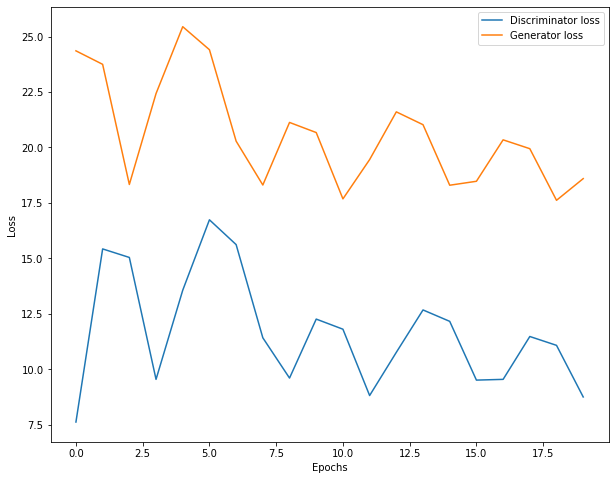

In [43]:
# Set up a vector (dict) to store the losses
losses = {"D":[], "G":[]}
samples = []
epochs=20
plt_frq=1
BATCH_SIZE=100
# def train(epochs=1, plt_frq=1, BATCH_SIZE=10000):
batchCount = int(X.shape[0] / BATCH_SIZE)
#     print('Epochs:', epochs)
#     print('Batch size:', BATCH_SIZE)
#     print('Batches per epoch:', batchCount)
    
for e in tqdm_notebook(range(1, epochs+1)):
        # if e == 1 or e%plt_frq == 0:
            # print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in range(batchCount): 
            
            # Create a batch by drawing random index numbers from the training set
            text_batch = X[np.random.randint(0, X.shape[0], size=BATCH_SIZE)]
            
            
            # print(text_batch.shape)
            # text_batch = text_batch.reshape(text_batch.shape[0], text_batch.shape[1], 1)
        

            # Generate the images from the noise
            noise = latent_1[np.random.randint(0, latent_1.shape[0], size=BATCH_SIZE)]
            generated_text= g.predict(noise)
            # print(generated_text.shape)
            # generated_text=generated_text.reshape(BATCH_SIZE,64)
            # samples.append(list(generated_text))
            X = np.concatenate((text_batch, generated_text))

            print(X.shape)
            # Create labels
            y = np.zeros(2*BATCH_SIZE)
            y[:BATCH_SIZE] = 0.9
            # y=y.reshape(2*BATCH_SIZE,1)# One-sided label smoothing

            # Train discriminator on generated images
            model.trainable = True
            # X=X.reshape(2*BATCH_SIZE,64)
            d_loss = model.train_on_batch(X, y)

            # Train generator
            # noise = np.random.normal(0, 1, size=(BATCH_SIZE, z_dim))
            # noise_2 = random.sample((list(latent_1)) ,BATCH_SIZE)
            # for _ in range(6):
            noise_2 = latent_1[np.random.randint(0, latent_1.shape[0], size=BATCH_SIZE)]
            # noise_2 =np.array(noise_2)
            generated_text= g.predict(noise_2)
            y2 = np.zeros(BATCH_SIZE)
            y2[:BATCH_SIZE] = 1
            model.trainable = False
            g_loss = gan.train_on_batch(noise_2, y2)

        # Only store losses from final batch of epoch
        losses["D"].append(d_loss)
        losses["G"].append(g_loss)

        # Update the plots
        # if e == 1 or e%plt_frq == 0:
        #     plot_generated()
plot_loss(losses)

--------------- Epoch 1 ---------------
--------------- Epoch 2 ---------------
--------------- Epoch 3 ---------------
--------------- Epoch 4 ---------------
--------------- Epoch 5 ---------------
--------------- Epoch 6 ---------------
--------------- Epoch 7 ---------------
--------------- Epoch 8 ---------------
--------------- Epoch 9 ---------------
--------------- Epoch 10 ---------------
--------------- Epoch 11 ---------------
--------------- Epoch 12 ---------------
--------------- Epoch 13 ---------------
--------------- Epoch 14 ---------------
--------------- Epoch 15 ---------------
--------------- Epoch 16 ---------------
--------------- Epoch 17 ---------------
--------------- Epoch 18 ---------------
--------------- Epoch 19 ---------------
--------------- Epoch 20 ---------------
--------------- Epoch 21 ---------------
--------------- Epoch 22 ---------------
--------------- Epoch 23 ---------------
--------------- Epoch 24 ---------------
--------------- Epoch 25 

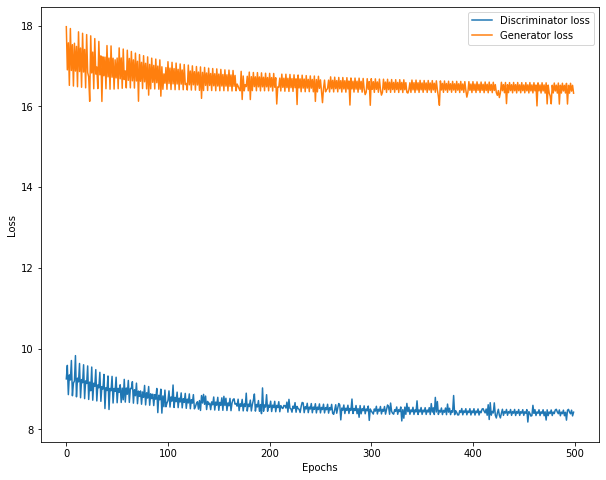

In [46]:
# Set up a vector (dict) to store the losses
losses = {"D":[], "G":[]}

# def train(
epochs=500
plt_frq=1
BATCH_SIZE=50
batchCount = int(X.shape[0] / BATCH_SIZE)
    # print('Epochs:', epochs)
    # print('Batch size:', BATCH_SIZE)
    # print('Batches per epoch:', batchCount)
    
for e in tqdm_notebook(range(1, epochs+1)):
        if e == 1 or e%plt_frq == 0:
            print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in range(batchCount):  # tqdm_notebook(range(batchCount), leave=False):
            # Create a batch by drawing random index numbers from the training set
            text_batch = X[np.random.randint(0, X.shape[0], size=BATCH_SIZE)]
            # Create noise vectors for the generator
            noise = np.random.normal(0, 1, size=(BATCH_SIZE, z_dim ))
            noise = latent_1[np.random.randint(0, latent_1.shape[0], size=BATCH_SIZE)]
            
            # Generate the images from the noise
            generated_text = g.predict(noise)
            X = np.concatenate((text_batch, generated_text))
            # print(X.shape)
            # Create labels
            y = np.zeros(2*BATCH_SIZE)
            y[:BATCH_SIZE] = 1#0.9  # One-sided label smoothing

            # Train discriminator on generated images
            # for _ in range(5):

            model.trainable = True
            d_loss = model.train_on_batch(X, y)
            for _  in range(10):

            # Train generator
                noise_2 = latent_1[np.random.randint(0, latent_1.shape[0], size=BATCH_SIZE)]
                y2 = np.ones(BATCH_SIZE)
                model.trainable = False
                g_loss = gan.train_on_batch(noise_2, y2)

        # Only store losses from final batch of epoch
        losses["D"].append(d_loss)
        losses["G"].append(g_loss)

        # Update the plots
        # if e == 1 or e%plt_frq == 0:
            # plot_generated()
plot_loss(losses)

In [51]:
losses["G"]

[[17.971079, 0.0],
 [16.902386, 0.0],
 [17.571686, 0.0],
 [16.518242, 0.0],
 [17.925375, 0.0],
 [16.88679, 0.0],
 [17.525787, 0.0],
 [16.500908, 0.0],
 [17.560848, 0.0],
 [16.872711, 0.0],
 [17.482246, 0.0],
 [16.485016, 0.0],
 [17.843805, 0.0],
 [16.86041, 0.0],
 [17.44308, 0.0],
 [16.471075, 0.0],
 [17.808008, 0.0],
 [16.848358, 0.0],
 [17.407373, 0.0],
 [16.457434, 0.0],
 [17.775673, 0.0],
 [16.83652, 0.0],
 [16.729609, 0.0],
 [16.122683, 0.0],
 [17.744738, 0.0],
 [16.826056, 0.0],
 [17.342484, 0.0],
 [16.434515, 0.0],
 [17.676962, 0.0],
 [16.797056, 0.0],
 [16.973896, 0.0],
 [16.43796, 0.0],
 [17.605528, 0.0],
 [16.77907, 0.0],
 [17.247883, 0.0],
 [16.12005, 0.0],
 [17.224472, 0.0],
 [16.756355, 0.0],
 [17.216936, 0.0],
 [16.43454, 0.0],
 [17.503592, 0.0],
 [16.72859, 0.0],
 [17.194204, 0.0],
 [16.42296, 0.0],
 [17.494547, 0.0],
 [16.720182, 0.0],
 [17.190643, 0.0],
 [16.426466, 0.0],
 [17.150738, 0.0],
 [16.70231, 0.0],
 [17.19392, 0.0],
 [16.43513, 0.0],
 [17.44578, 0.0],
 [16.68

In [57]:
g.predict(d_data[20000:20001])

array([[[0.00463628],
        [0.06293033],
        [0.02192835],
        [0.04324522],
        [0.01036189],
        [0.00313116],
        [0.02203288],
        [0.06533231],
        [0.00766332],
        [0.00721853],
        [0.0201703 ],
        [0.00550157],
        [0.00990792],
        [0.02310393],
        [0.00749826],
        [0.00778133],
        [0.02324688],
        [0.01875322],
        [0.00488743],
        [0.00697005],
        [0.00919808],
        [0.00531709],
        [0.00386277],
        [0.02570161],
        [0.0101409 ],
        [0.01058163],
        [0.01376397],
        [0.00742631],
        [0.00897773],
        [0.00641424],
        [0.00701552],
        [0.01392227],
        [0.01014457],
        [0.02628161],
        [0.0218362 ],
        [0.00304786],
        [0.02437809],
        [0.02607518],
        [0.02339568],
        [0.00386607],
        [0.00454416],
        [0.01112548],
        [0.0063061 ],
        [0.05086954],
        [0.00932896],
        [0